# Binary Classification Model using Julia Flux

Version: 1.00 (Initial)

### Readme

I did the "**Deep Learning with Flux**" course provided by **Julia Academy** (https://juliaacademy.com/courses/). I express my sincere gratitude to **Dr. Matt Bauman** for presenting this course and sharing the associated Jupyter Notebook. This notebook is associated with first lecture "**Introduction to Flux**" of the mentioned course.

As I was attending the first lecture, I realized I need to code myself to understand and record my inferences and in the process came up with this working notebook. Intent is to have this for my future reference as well as be useful to someone new to the field learning ML/DL.

This notebook provides a quick introduction to **Julia Flux** by having a **Binary Classification Model** implemented to **classify Apples and Bananas Images**. 

Details of what this notebook covers is listed below:
- How to setup the Environment
- Where to get the datasets from 
- Which packages to install and how
- Quick Introduction to Activation Function (Sigmoid)
- Quick Introduction to Loss and Optimizer Function
- Create a Model with Flux - Get output for a random input - Compare output with Manual Implementation
- Use Model As Is (without training) to classify Apples and Bananas
- Use Manually Trained Model to classify Apples and Bananas
- Use Flux Trained Model to classify Apples and Bananas
    - Visualization of the results using plots

We have **492 Apple** Instances and **490 Banana** Instances (Images) widely spaced apart per their **Red** and **Green** values. Refer below image:
<img src="images/Input.jpg">

By using the Flux Model, we are able to classify these instances into 2 Classes - **"0" for Apples** (1 to 492) and **"1" for Bananas** (493 to 982). Refer below image:
<img src="images/Prediction.jpg">

### How to setup the Environment

I am using **Julia REPL** and **Jupyter Environment** for the notebook. If you wish to setup this environment, here is what I did:
- I installed Julia 1.3.1 from: https://julialang.org/downloads/
- Once I installed Julia, I invoked Jupyter Environment from the REPL using following:
    - julia> using IJulia
    - julia> notebook(detached=true)     
- I created a New Notebook (File->New Notebook... select Julia) ... which is this notebook and started editing.

###  Where to get the datasets from 

I got data files from this URL as mentioned in the course: https://github.com/JuliaComputing/JuliaAcademyData.jl
- go to "courses/Deep learning with Flux/data/"
- you will find files: apples.dat, bananas.dat

### Which packages to install and how

I added the packages I did not have on my system - so that can use them during the course - by using following code at the REPL
- **Flux**
    - is the deep learning package from Julia - helps create/train/use models
    - julia> using Pkg
    - julia> Pkg.add("Flux")
- **Plots**
    - helps create graphs for visualization as you build & refine your model
    - julia> using Pkg
    - julia> Pkg.add("Plots")
- **CSV**
    - helps read data from CSV files to use as inputs for the model
    - julia> using Pkg
    - julia> Pkg.add("CSV")
- **DataFrames**
    - data is stored/modified in structures called dataframes, dataframes provides support for same. 
    - julia> using Pkg
    - julia> Pkg.add("DataFrames")

### Quick Introduction to Activation Function (Sigmoid)

Sigmoid is a commonly used activation function. Flux supports sigmoid function as a built-in function.

In [1]:
using Flux

┌ Warning: CuArrays.jl only supports CUDNN v7.6 or higher
└ @ CuArrays C:\Users\Chinmoy\.julia\packages\CuArrays\HE8G6\src\CuArrays.jl:121


In [2]:
?σ

"σ" can be typed by \sigma<tab>

search: σ logσ hardσ



```
σ(x) = 1 / (1 + exp(-x))
```

Classic [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) activation function.


Plot the sigmoid function.

In [3]:
using Plots

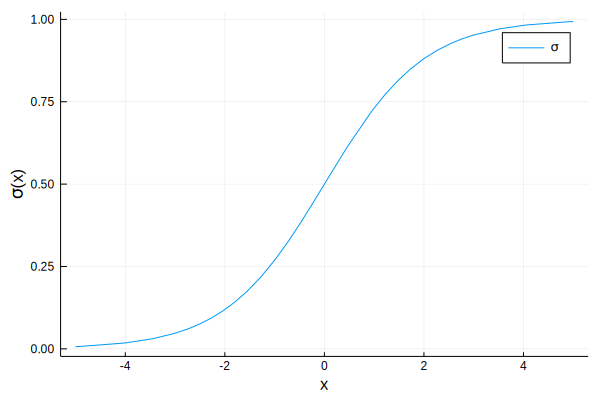

In [4]:
plot(σ, -5, 5, label="\\sigma", xlabel="x", ylabel="\\sigma\\(x\\)")

### Quick Introduction to Loss and Optimizer Function

Mean Squarred Error Function calculates the mean of the difference of the predicted output(y-cap) and expected output(y) for all instances (say n). mse = sum of all (y-cap - y) divided by n

In [5]:
methods(Flux.mse)

# 1 method for generic function "mse":
[1] mse(ŷ, y) in Flux at C:\Users\Chinmoy\.julia\packages\Flux\NpkMm\src\layers\stateless.jl:15

Loss function is used to calculate the loss to get an idea of how accurately is model emulating the expected behaviour so that the optimizer function can then decide the direction of movement (gradient descent) to optimize the model.

### Create a Model with Flux - Get output for a random input - Compare output with Manual Implementation

A neuron can be automatically created using the Dense function supported with Flux. We willl create a neuron with 2 inputs, 1 output and sigmoid as the activation function.

In [6]:
model = Dense(2,1,σ)

Dense(2, 1, σ)

Flux's model object comes with places to store weights and bias denoted by W and b respectively.

In [7]:
model.W

1×2 Array{Float32,2}:
 1.15517  0.445622

In [8]:
model.b

1-element Array{Float32,1}:
 0.0

In [9]:
typeof(model.W)

Array{Float32,2}

In [10]:
typeof(model.b)

Array{Float32,1}

Let us feed a random input to the model to see the output from the model.

In [11]:
x = rand(2)

2-element Array{Float64,1}:
 0.7147726950122226 
 0.11105698192099722

In [12]:
model(x)

1-element Array{Float32,1}:
 0.70582116

Let us manually implement the operations done by above statement to get an understanding of what Flux did here i.e. we will multiply the model weights with the input and add bias, then pass the result through the sigmoid activation function. We will use the broadcast operator "." to apply sigmoid activation function over all the array elements.

In [13]:
σ.(model.W*x + model.b)

1-element Array{Float64,1}:
 0.7058211107317147

Note: model output from Flux matches with the manual implementation of the same logic. Flux implementation will be useful when the network is large (more neurons, more layers) so that we do not have to implement the logic manually and can get the output with fewer lines of code.

### Use Model As Is (without training) to classify Apples and Bananas

Load apples and bananas images from the respective files. Delimiters help distinguish one image file from the other while reading. To keep it simple for this exercise, let us exclude instances which have missing data. Normalizing Names helps a common name for the columns e.g. some instances might have the column name as "red" and some as " red", however, both mean same.

In [14]:
using CSV

In [15]:
using DataFrames

Load 492 apple images into a dataframe. Each image data is a row, hence 492 rows. There are 5 columns which has details for a given image = height of the image, width of the image; red value of the image, green value of the image, blue value of the image corresponding the RGB values of the image.

In [16]:
apples = DataFrame(CSV.File("data/apples.dat", delim='\t', allowmissing=:none, normalizenames=true))

┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV C:\Users\Chinmoy\.julia\packages\CSV\1vUJg\src\CSV.jl:324


,height,width,red,green,blue
,Int64,Int64,Float64,Float64,Float64
1,90,99,0.501466,0.229304,0.148436
2,94,99,0.434225,0.128667,0.108166
3,94,99,0.43412,0.128334,0.108348
4,94,99,0.432922,0.127469,0.106358
5,94,99,0.433292,0.126873,0.106027
6,94,99,0.432438,0.127182,0.105781
7,94,99,0.432922,0.127296,0.106408
8,95,99,0.431167,0.126159,0.104195
9,95,99,0.431867,0.125932,0.104244


In [17]:
typeof(apples)

DataFrame

Load 490 banana images into a dataframe. Each image data is a row, hence 490 rows. There are 5 columns which has details for a given image = height of the image, width of the image; red value of the image, green value of the image, blue value of the image corresponding the RGB values of the image.

In [18]:
bananas = DataFrame(CSV.File("data/bananas.dat", delim='\t', allowmissing=:none, normalizenames=true))

┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV C:\Users\Chinmoy\.julia\packages\CSV\1vUJg\src\CSV.jl:324


,height,width,red,green,blue
,Int64,Int64,Float64,Float64,Float64
1,98,99,0.583507,0.500662,0.207504
2,50,99,0.609666,0.514869,0.186871
3,52,99,0.610012,0.515759,0.187504
4,99,69,0.568033,0.492939,0.239316
5,51,99,0.609766,0.51485,0.183329
6,53,99,0.608089,0.514609,0.183374
7,53,99,0.608676,0.515487,0.186206
8,53,99,0.609278,0.516486,0.188582
9,99,67,0.569099,0.494501,0.241941


Here each instance (image) has 5 inputs corresponding to it i.e. height/weight/red value/green value/blue value. Our model accepts 2 inputs only. We will use the red and green values of the images to classify them as apples or bananas. 

Note: To keep the focus on building an model and seeing it run, we chose the red/green... technically, we can look at other options e.g. run an exercise to see which 2 values will give best result and chose those 2 OR build a 3 input model so that we can feed all 3 values etc.

In [19]:
x_apples = [ [row.red, row.green] for row in eachrow(apples) ]

492-element Array{Array{Float64,1},1}:
 [0.5014661151631883, 0.22930441097534052] 
 [0.4342254940829249, 0.1286670449863579]  
 [0.4341196192611507, 0.1283343194344977]  
 [0.43292152183068955, 0.12746865916878627]
 [0.4332916920418286, 0.12687320747253036] 
 [0.43243837386176553, 0.12718165906107473]
 [0.4329222095428659, 0.127296222767609]   
 [0.4311669294311532, 0.12615909751878962] 
 [0.43186658074810524, 0.12593155154602345]
 [0.4303403153394724, 0.12640444560215408] 
 [0.4302302502007849, 0.12569890987963223] 
 [0.4850330408406459, 0.20774997291734418] 
 [0.4289987119309, 0.12556138558335778]    
 ⋮                                         
 [0.4567426454785655, 0.13869407466403796] 
 [0.4590486162219305, 0.1395517990505897]  
 [0.4601581872919335, 0.14117849279714548] 
 [0.46196735818763357, 0.1421665971353089] 
 [0.4629390550656122, 0.1440671374165337]  
 [0.46432223450752835, 0.14380783472718045]
 [0.46510595158618334, 0.1451697450733138] 
 [0.4674854279681992, 0.1466916184299

In [20]:
typeof(x_apples)

Array{Array{Float64,1},1}

In [21]:
size(x_apples)

(492,)

In [22]:
size(x_apples[1])

(2,)

Observe x_apples is an array of array. It is a column vector of 492 rows (corresponding to 492 apple images), each row containing a 2-row column vector, where the two rows corresponds to red and green values of the image. Each instance 2-row column vector can be fed an input to our model (2 inputs, 1 output).

In [23]:
x_bananas = [ [row.red, row.green] for row in eachrow(bananas) ]

490-element Array{Array{Float64,1},1}:
 [0.5835067538126356, 0.500662309368192]  
 [0.6096658836445241, 0.514868541076373]  
 [0.61001222127424, 0.5157592947018083]   
 [0.5680333392636676, 0.4929391278094967] 
 [0.6097662880271572, 0.5148498882514222] 
 [0.6080886893475433, 0.5146088965412025] 
 [0.6086763977507786, 0.5154866998805462] 
 [0.6092775365179625, 0.5164860873506747] 
 [0.5690986557452848, 0.4945007761667278] 
 [0.610284435646972, 0.5161825666623635]  
 [0.607329117213896, 0.5153440757746397]  
 [0.6083665640474657, 0.5146497517166334] 
 [0.6063312071816673, 0.5137782965773128] 
 ⋮                                        
 [0.5291302161890399, 0.4403100385453329] 
 [0.5287307644576823, 0.4565478406552493] 
 [0.5240277326400172, 0.45237940480059413]
 [0.5239057876671794, 0.4525711129522229] 
 [0.5238233433790978, 0.45140008185437314]
 [0.5224889335097888, 0.44997337957681116]
 [0.5175726263709806, 0.4443909309164674] 
 [0.5159556048834634, 0.4419119496855347] 
 [0.51758501781

Observe x_bananas is an array of array. It is a column vector of 490 rows (corresponding to 490 banana images), each row containing a 2-row column vector, where the two rows corresponds to red and green values of the image. Each instance 2-row column vector can be fed an input to our model (2 inputs, 1 output).

Model needs to receive inputs for both apples and bananas. Hence, we will combine x_apples and x_bananas to create a xs. xs will have 982 rows... first 492 rows corresponding to apples, later 490 rows corresponding to bananas.

In [24]:
xs = [x_apples;x_bananas]

982-element Array{Array{Float64,1},1}:
 [0.5014661151631883, 0.22930441097534052] 
 [0.4342254940829249, 0.1286670449863579]  
 [0.4341196192611507, 0.1283343194344977]  
 [0.43292152183068955, 0.12746865916878627]
 [0.4332916920418286, 0.12687320747253036] 
 [0.43243837386176553, 0.12718165906107473]
 [0.4329222095428659, 0.127296222767609]   
 [0.4311669294311532, 0.12615909751878962] 
 [0.43186658074810524, 0.12593155154602345]
 [0.4303403153394724, 0.12640444560215408] 
 [0.4302302502007849, 0.12569890987963223] 
 [0.4850330408406459, 0.20774997291734418] 
 [0.4289987119309, 0.12556138558335778]    
 ⋮                                         
 [0.5291302161890399, 0.4403100385453329]  
 [0.5287307644576823, 0.4565478406552493]  
 [0.5240277326400172, 0.45237940480059413] 
 [0.5239057876671794, 0.4525711129522229]  
 [0.5238233433790978, 0.45140008185437314] 
 [0.5224889335097888, 0.44997337957681116] 
 [0.5175726263709806, 0.4443909309164674]  
 [0.5159556048834634, 0.4419119496855

Model needs to classify the inputs as apples or bananas i.e. it needs to unique output for each say 0 for apples and 1 for bananas - these outputs are also called as labels (label 0 for apple, label 1 for bananas). We need to create the expected output column vector (ys)- this will be required to train the model. 

ys is a column vector with 982 rows ... first 492 rows corresponding to 0 for apples, later 490 rows corresponding to 1 for bananas. This is accomplished by using the fill function to fill with 0 and 1 for the respectibe rows obtained by using size function on x_apples, x_bananas respectively.

In [25]:
ys = [fill(0,size(x_apples)); fill(1,size(x_bananas))]

982-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

Our model is:

In [26]:
model = Dense(2,1,σ)

Dense(2, 1, σ)

Model is not yet trained. Hence, it must be having random weights and bias values. Let us use to predict outputs.

In [27]:
model(xs[1])

1-element Array{Float32,1}:
 0.65322804

In [28]:
model(xs[end])

1-element Array{Float32,1}:
 0.7196695

Observe, we expect a 0 for first element as it is an apple and 1 for last element as it is a banana... however the model is not able to predict these values as it is not trained yet.

### Use Manually Trained Model to classify Apples and Bananas

We will calculate the loss for 1 sample/instance to use it as feedback to the model to optimize it's weights. We will use mean squarred error as the loss function. We will use the first instance in xs as the input and ys as the expected output. Note: model(xs[1]) gives the predicted output and hence enables in calculating the loss.

In [29]:
loss = Flux.mse(model(xs[1]),ys[1])

0.42670688f0

In [30]:
typeof(loss)

Float32

Let us observe the weight values of the model before the feedback.

In [31]:
model.W

1×2 Array{Float32,2}:
 0.627827  1.38866

Let us now feed the loss to the model.

In [32]:
# below code does not work with Julia v1.3.1
# understood Tracker was replaced with Zygote, which is a very different structure. 
# need to try gradient(function, data) - Zygote docs have simple examples of this.
# using Flux.Tracker
# back!(loss)

I could not implement the code, however, writing down the idea we wanted to do. You feed the loss from 1 sample to the model. the model uses it to optimize its parameters. You can use the model to predict the output for the same input and see an small improvement. When you repeat above feedaback multiple times and over multiple samples to the model, the model gets trained better and the predicted value from the model becomes more closer to the expected value.

### Use Flux Trained Model to classify Apples and Bananas

We will use Flux.train! function to train the model.

In [33]:
?Flux.train!

```
train!(loss, params, data, opt; cb)
```

For each datapoint `d` in `data` computes the gradient of `loss(d...)` through backpropagation and calls the optimizer `opt`.

In case datapoints `d` are of numeric array type, assumes no splatting is needed  and computes the gradient of `loss(d)`.

Takes a callback as keyword argument `cb`. For example, this will print "training" every 10 seconds:

train!(loss, params, data, opt,          cb = throttle(() -> println("training"), 10))

The callback can call `Flux.stop()` to interrupt the training loop.

Multiple optimisers and callbacks can be passed to `opt` and `cb` as arrays.


Define Model. 2 inputs, 1 output, Sigmoid as the Activation Function.

In [34]:
model = Dense(2,1,σ)

Dense(2, 1, σ)

Define Loss Function. We will use Mean Squarred Error Function. We provide predicted and expected output parameters to the function.

In [35]:
Loss(x,y) = Flux.mse(model(x),y)

Loss (generic function with 1 method)

Define Optimizer Function. We will use ADAM. We will use default values

In [36]:
?ADAM

search: ADAM ADAMW AdaMax RADAM NADAM backend_name AbstractDataFrame ADAGrad



```
ADAM(η, β::Tuple)
```

Implements the ADAM optimiser.

## Paramters

  * Learning Rate (`η`): Defaults to `0.001`.
  * Beta (`β::Tuple`): The first element refers to β1 and the second to β2. Defaults to `(0.9, 0.999)`.

## Examples

```julia
opt = ADAM() # uses the default η = 0.001 and β = (0.9, 0.999)

opt = ADAM(0.001, (0.9, 0.8))
```

## References

[ADAM](https://arxiv.org/abs/1412.6980v8) optimiser.


In [37]:
opt = ADAM()

ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}())

Form the data for training - have the input, output together

In [38]:
data = zip(xs,ys)

Base.Iterators.Zip{Tuple{Array{Array{Float64,1},1},Array{Int64,1}}}((Array{Float64,1}[[0.5014661151631883, 0.22930441097534052], [0.4342254940829249, 0.1286670449863579], [0.4341196192611507, 0.1283343194344977], [0.43292152183068955, 0.12746865916878627], [0.4332916920418286, 0.12687320747253036], [0.43243837386176553, 0.12718165906107473], [0.4329222095428659, 0.127296222767609], [0.4311669294311532, 0.12615909751878962], [0.43186658074810524, 0.12593155154602345], [0.4303403153394724, 0.12640444560215408]  …  [0.5240277326400172, 0.45237940480059413], [0.5239057876671794, 0.4525711129522229], [0.5238233433790978, 0.45140008185437314], [0.5224889335097888, 0.44997337957681116], [0.5175726263709806, 0.4443909309164674], [0.5159556048834634, 0.4419119496855347], [0.5175850178187539, 0.44482679017155075], [0.5103568171454631, 0.4360222868217053], [0.5088734503702476, 0.43433036580969037], [0.5282048652067627, 0.4401388105372926]], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1

Train the model once and predict the values for the first (apple -> 0) and last instance (banana -> 1) to observe the model performance.

In [39]:
Flux.train!(Loss, params(model), data, opt)

In [40]:
model(xs[1])

1-element Array{Float32,1}:
 0.505622

In [41]:
model(xs[end])

1-element Array{Float32,1}:
 0.50880194

Train the model 10 times and predict the values for the first (apple -> 0) and last instance (banana -> 1) to observe the improvement in model performance... minor improvement.

In [42]:
for i in 1:10
    Flux.train!(Loss, params(model), data, opt)
end

In [43]:
model(xs[1])

1-element Array{Float32,1}:
 0.55303115

In [44]:
model(xs[end])

1-element Array{Float32,1}:
 0.6995519

Train the model 100 times and predict the values for the first (apple -> 0) and last instance (banana -> 1) to observe the improvement in model performance... major improvement. We get values closure to 0 for first instance and closure to 1 for the last instance.

In [45]:
for i in 1:100
    Flux.train!(Loss, params(model), data, opt)
end

In [46]:
model(xs[1])

1-element Array{Float32,1}:
 0.14228071

In [47]:
model(xs[end])

1-element Array{Float32,1}:
 0.8858558

Get the model outputs for all inputs into a predicted_output array.

In [48]:
size(xs,1)

982

In [49]:
global predicted_output = []
                   for i in 1:size(xs,1)
                        push!(predicted_output, model(xs[i]))
                   end   

In [50]:
size(predicted_output)

(982,)

In [51]:
predicted_output

982-element Array{Any,1}:
 Float32[0.14228071] 
 Float32[0.03091258] 
 Float32[0.030737795]
 Float32[0.03038064] 
 Float32[0.030017786]
 Float32[0.03027177] 
 Float32[0.030285848]
 Float32[0.029842224]
 Float32[0.029650293]
 Float32[0.030057719]
 Float32[0.029686823]
 Float32[0.10502223] 
 Float32[0.029734578]
 ⋮                   
 Float32[0.8858581]  
 Float32[0.91322964] 
 Float32[0.9082133]  
 Float32[0.90854603] 
 Float32[0.9067367]  
 Float32[0.90485376] 
 Float32[0.8970597]  
 Float32[0.8932356]  
 Float32[0.89780504] 
 Float32[0.88426405] 
 Float32[0.88152343] 
 Float32[0.8858558]  

predicted_output elements has values in the range [0,1]. Convert the floating point values to 0 or 1 - to represent Apples and Bananas respectively by using the threshold value as 0.5. 

In [52]:
predicted_output[1]

1-element Array{Float32,1}:
 0.14228071

In [53]:
predicted_output[1][1]

0.14228071f0

In [54]:
predicted_output[982][1]

0.8858558f0

In [55]:
for i in 1:size(xs,1)
    if(predicted_output[i][1] < 0.5)
        predicted_output[i]=0
    else
        predicted_output[i]=1
    end
end

In [56]:
predicted_output[1][1]

0

In [57]:
predicted_output[982][1]

1

### Visualization of the results using plots

You can observe the apples and bananas instances are properly spaced apart ... implies we can accurately classify them into 2 classes - Apples as "0" and Bananas as "1".

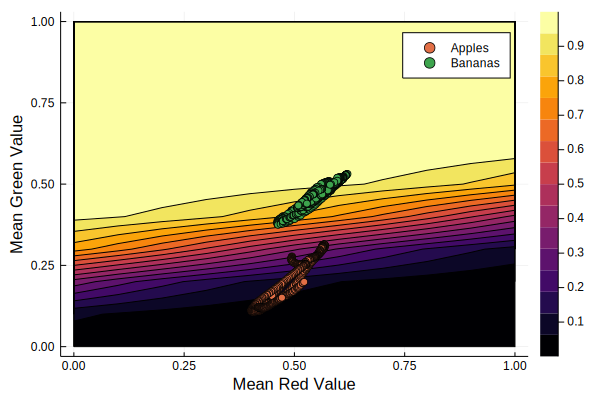

In [63]:
#contour(0:.1:1, 0:.1:1, (x, y) -> model([x,y])[].data, fill=true)
#newer versions of Flux do not return  a Tracked object, but the data directly... hence not using the ".data" field
contour(0:.1:1, 0:.1:1, (x, y) -> model([x,y])[], fill=true)
scatter!(first.(x_apples), last.(x_apples), label="Apples")
scatter!(first.(x_bananas), last.(x_bananas), label="Bananas")
xlabel!("Mean Red Value")
ylabel!("Mean Green Value")

Plot predicted_output. Observe:
- outputs for inputs from 0 to 492 corresponding to Apples are 0
- outputs for inputs from 493 to 982 corresponding to Bananas are 1

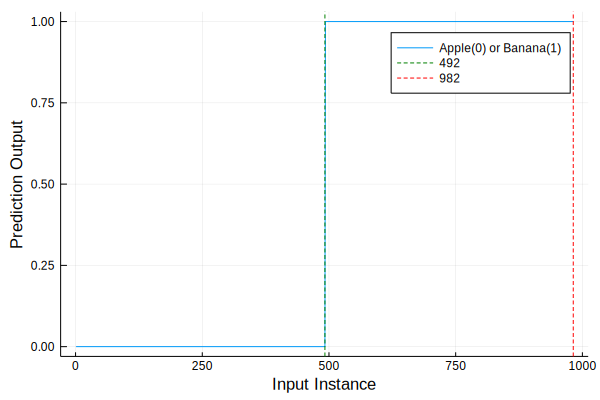

In [59]:
plot(predicted_output,xlim=[0,982],ylim=[0,1],xlabel="Input Instance",ylabel="Prediction Output",label="Apple(0) or Banana(1)")
#plot!([492,492],[0,1], color=:red, ls=:dash)
#plot!([982,982],[0,1], color=:red, ls=:dash)
vline!([492], color=:green, ls=:dash, lw=1, label="492")
vline!([982], color=:red, ls=:dash, lw=1, label="982")

Reconfirm there are not false positive detection for apples.

In [60]:
global applesTP = 0
global applesFP = 0
for j in 1:492
    if (predicted_output[j][1] == 0)
        applesTP +=1
    else
        applesFP +=1
    end
end
println("Apples True Positives = ",applesTP)
println("Apples False Positives = ",applesFP)

Apples True Positives = 492
Apples False Positives = 0


Reconfirm there are no false positive detection for bananas.

In [61]:
global bananasTP = 0
global bananasFP = 0
for k in 493:982
    if (predicted_output[k][1] == 1)
        bananasTP +=1
    else
        bananasFP +=1
    end
end
println("Bananas True Positives = ",bananasTP)
println("Bananas False Positives = ",bananasFP)

Bananas True Positives = 490
Bananas False Positives = 0
